![seaborn](https://d2h0cx97tjks2p.cloudfront.net/blogs/wp-content/uploads/sites/2/2018/07/seaborn.png) 
# The good, the bad, the seaborn


#### Whats wrong with this data visualization? (hint: so many things)

<img src="https://pbs.twimg.com/media/DNTFhGaXcAEbrMO.jpg" width=800>

Learning goals:
- Create a list of best practices for data visualization
- Identify the differences between matplotlib and seaborn
- Create a visualization with seaborn, applying best practices

## Goal 1: Create a list of best practices for data visualization

Documenting best practices:

In groups: [article 1](https://www.jackhagley.com/What-s-the-difference-between-an-Infographic-and-a-Data-Visualisation), [article 2](https://thoughtbot.com/blog/analyzing-minards-visualization-of-napoleons-1812-march), [article 3](http://dataremixed.com/2016/04/the-design-of-everyday-visualizations/), [article 4](https://visme.co/blog/data-storytelling-tips/),  article 5: Visualizations That Really Work.pdf (in folder), [article 6](https://www.tableau.com/learn/articles/best-beautiful-data-visualization-examples)

To fill in: [Best practices deck](https://docs.google.com/presentation/d/1SxjFajd97eMVUOm4k1yxoDC5f7UtBw_iodMfgqCYehg/edit#slide=id.g5b7079e757_0_0) 

## Goal 2:  Identify differences between seaborn & matplotlib


### Two code examples to accomplish the same plot:

**Resources:**
- [python graph gallery on seaborn](https://python-graph-gallery.com/seaborn/)
- [seaborn](https://seaborn.pydata.org/)


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

# Load in data
tips = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv")


In [2]:
tips.head()


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


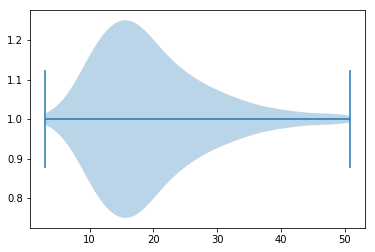

In [3]:
# Matplotlib:

# Initialize Figure and Axes object
fig, ax = plt.subplots()

# Create violinplot
ax.violinplot(tips["total_bill"], vert=False)

# Show the plot
plt.show()

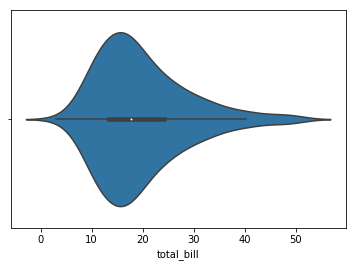

In [4]:
# Seaborn:

import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
tips = sns.load_dataset("tips")
# tips = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv")

# Create violinplot
# sns.violinplot(x = "total_bill", data=tips)
sns.violinplot(x = "total_bill", data=tips)

# Show the plot
plt.show()

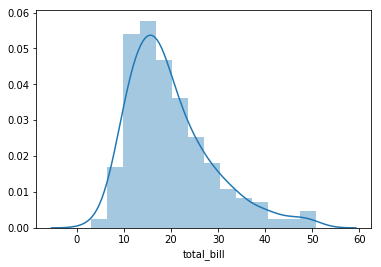

In [6]:
sns.distplot(tips.total_bill)
plt.show()

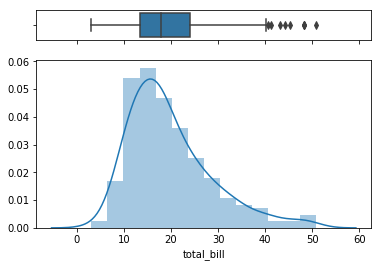

In [13]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

sns.boxplot(tips['total_bill'], ax=ax_box)
sns.distplot(tips['total_bill'], ax=ax_hist)
ax_box.set(xlabel='')
plt.show()

<Figure size 576x576 with 0 Axes>

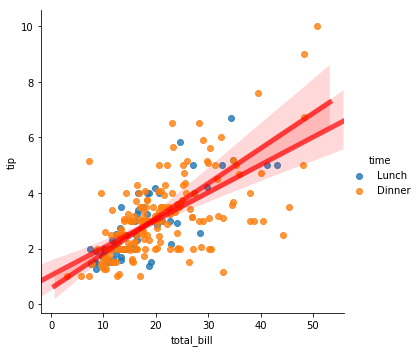

In [22]:
fig = plt.figure(figsize=(8,8))
sns.lmplot(x="total_bill", y="tip", data=tips,
            line_kws={"color":"r","alpha":0.7,"lw":5},
            hue='time')
plt.show()

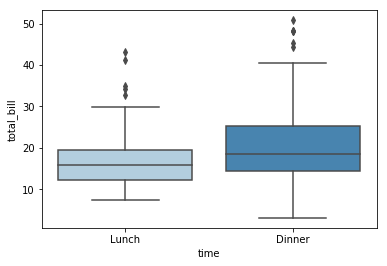

In [26]:
sns.boxplot(x=tips["time"], y=tips['total_bill'], palette="Blues")
plt.show()

### In depth comparison:

#### Groups 1:3

For each plot:
- How is the code to create it different from the maplotlib code?
- What are the customization options? 
- What are the top 3 most important customization options to know(with code) ?

Group 1 - [histograms](https://python-graph-gallery.com/histogram/)<br>
Group 2 - [scatter plot](https://python-graph-gallery.com/scatter-plot/)<br>
Group 3 - [boxplot](http://python-graph-gallery.com/boxplot/)<br>

#### Groups 4:5
- What new vocabulary was introduced in these posts?
- What is the benefit of these new options?
- What code/options do you need to know? 

Group 4 - [diverging, sequential, discrete color palattes](https://python-graph-gallery.com/101-make-a-color-palette-with-seaborn/)<br>
Group 5 - [seaborn themes](https://python-graph-gallery.com/104-seaborn-themes/) <br>

#### Group 6:
[seaborn themes w matplotlib](https://python-graph-gallery.com/106-seaborn-style-on-matplotlib-plot/)
How does this work?

_Time to work:_ 15 minutes <br>
_Time to discuss as large group:_ 10 minutes

## Goal 3: Create a visualization with seaborn, applying best practices

[exercise from data world](https://data.world/makeovermonday/2018w37-paying-the-president)


In [1]:
import pandas as pd
df = pd.read_excel('https://query.data.world/s/5qxp2ldwsel3ow2pq5mkvfas2rfaup')

In [3]:
df.head()

,type,source,date,amount,purpose_scrubbed,property_scrubbed,purpose,property,city,state
0,FEC,"Donald J. Trump for President, Inc.","Apr 1, 2016",9000.00,Rent,Trump Plaza LLC,RENT,TRUMP PLAZA LLC,New York,NY
1,FEC,"Donald J. Trump for President, Inc.","Apr 1, 2016",6000.00,Rent,Trump CPS LLC,RENT,TRUMP CPS LLC,New York,NY
2,FEC,"Donald J. Trump for President, Inc.","Apr 1, 2017",39816.67,Rent,Trump Tower Commercial LLC,RENT,TRUMP TOWER COMMERCIAL LLC,Hicksville,NY
3,FEC,"Donald J. Trump for President, Inc.","Apr 1, 2017",1000.00,Rent,Trump Restaurants LLC,RENT,TRUMP RESTAURANTS LLC,New York,NY
4,government,Department of Defense,"Apr 10, 2017",1422.00,Lodging,Trump Hotel Panama,Hotels-Lodging,Trump International Hotel & Tower Panama,Panama City,Panama


In [6]:
df.purpose_scrubbed.value_counts()

Lodging    438
Food       259
Event      155
Payroll    111
Rent        89
Travel      69
Other       65
Legal        7
Name: purpose_scrubbed, dtype: int64

In [19]:
[x for x in df.purpose_scrubbed.unique() if x != 'Travel']

['Rent', 'Lodging', 'Food', 'Other', 'Event', 'Payroll', 'Legal']

#### For extra fun:
[visualization challenges](http://www.storytellingwithdata.com/blog/2019/3/1/swdchallenge-visualize-this-data)

[seaborn cheatsheet](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Python_Seaborn_Cheat_Sheet.pdf)